# Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

### Adult Example

In [3]:
# The actual data is in the file adult.data
# The file adult.names contains a descripion of the columns in the dataset
# We need to put two dots '..' before the name of the files.
df = pd.read_csv(
    '../data/adult.data',
    names=["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
        "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
        "hours_per_week", "country", "income"],
        sep=r'\s*,\s*',
        engine='python',
        na_values="?")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.shape

(32561, 15)

The dataset contains 32561 rows and 15 columns. The last column is the *response variable*. It is a binary indicator of whether an individual earns more than 50K. This is taken to be the cutoff to indicate that an individual is a high-earner.

One of the columns is *fnlwgt*. This is the sampling weight. It will not be used by us.

In [6]:
df.drop(columns='fnlwgt', inplace=True)

In [7]:
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Numerical Summaries

In [8]:
df.info() 
# missing values for certain varaibles. Note the number.
# object is not numerical, orthers are integer.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         30725 non-null object
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
country           31978 non-null object
income            32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [9]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Columns: 14 entries, age to income
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


There are 6 quantitative variables:
1. age
2. education_num
3. capital_gain
4. capital_loss
5. hours_per_week

The remaining variables are categorical variables. As we can see, some columns have missing values in them.

### Mean, Median and Variance

In [10]:
df.describe()

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.describe().round(1) # 只保留一位小数
# mean is bigger than median, so there is big value on the right side 
# to look at the range between percentiles.
#--> right skewed
# many people do not trade stocks, and note that 99999.0 is not the true max.
# 99.0 is neither the ture max.

,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.0,32561.0,32561.0,32561.0,32561.0
mean,38.6,10.1,1077.6,87.3,40.4
std,13.6,2.6,7385.3,403.0,12.3
min,17.0,1.0,0.0,0.0,1.0
25%,28.0,9.0,0.0,0.0,40.0
50%,37.0,10.0,0.0,0.0,40.0
75%,48.0,12.0,0.0,0.0,45.0
max,90.0,16.0,99999.0,4356.0,99.0


Although there are no missing values, we should observe the following:

* *age* is right skewed (non-symmetric).
* Is 99999 for *capital_gain* missing value? 75% of individuals have 0 for this column. Is it useful for predicting high-income status?
* Similarly for *capital_loss*.
* *hours_per_week* has a 99 value as well. Slightly below 75% of the individuals work 40 hours or less.

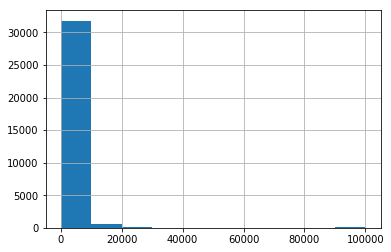

In [11]:
df.capital_gain.hist()
# to visualize data.
# df.capital_gain extract capital_gain colume

Text(0.5,1,'Capital Gain')

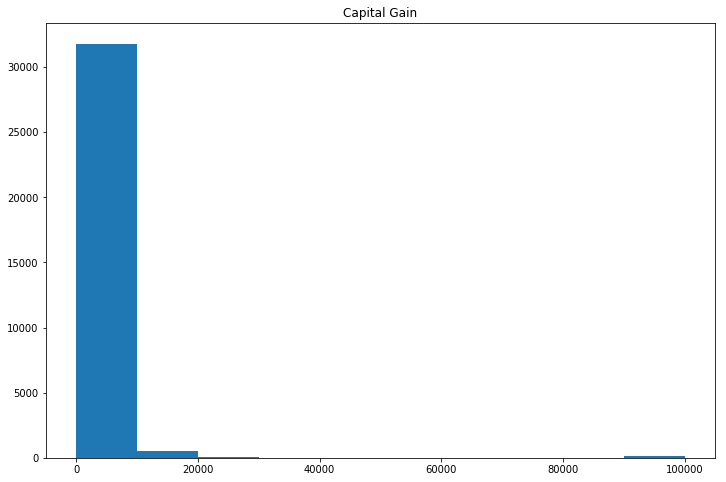

In [13]:
df.capital_gain.hist(figsize=(12,8), grid=False)
plt.title("Capital Gain")
# huge gap between 30000 to 100000.
# most people are zero.

In [14]:
np.max(df.capital_gain[df.capital_gain < 99999]) 
# the largest below 99999 is 41310.

41310

In [16]:
len(np.argwhere(df.capital_gain == 99999))

159

The above two statements tell us that the next highest capital gain, after 99999, was 41310. There were 159 individuals with a capital gain of 99999.

In [17]:
np.max(df.hours_per_week[df.hours_per_week < 99])

98

In [18]:
np.sum(df.hours_per_week == 99)

85

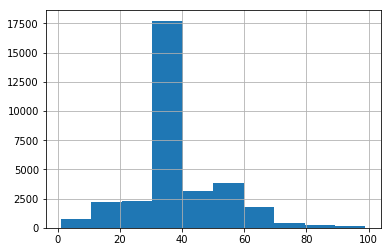

In [19]:
df.hours_per_week.hist()

Although there are 85 individuals with 99 hours per week, it does not seem to be an artificial spike in the values, nor is there a strange gap to the rest of the readings.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013082D42FD0>]],
      dtype=object)

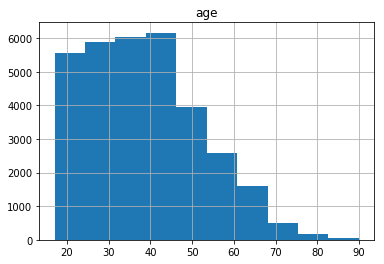

In [20]:
df.hist('age')
# right skewed.
# identify:
# 1. mode\median; 2. right (few obs are very large)\left (small) skewed; 3. are there sub_populations? (在大坡度的尾部还有一个小坡度)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000013083B7E358>,
      dtype=object)

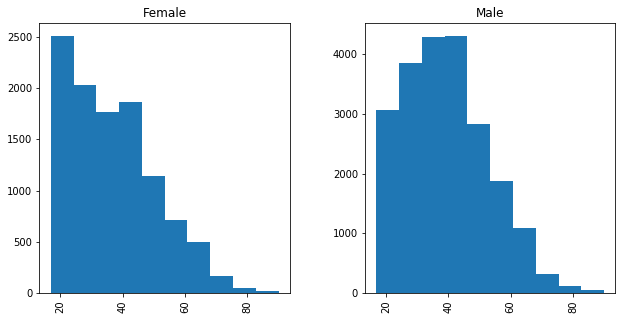

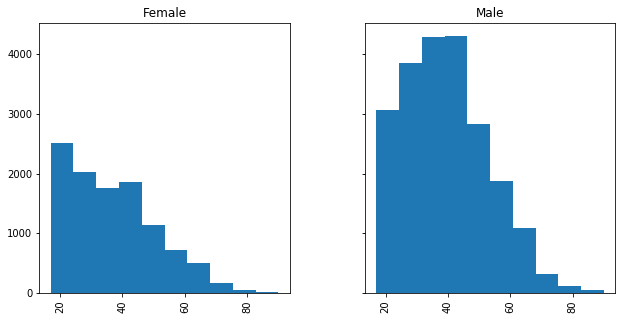

In [25]:
df.hist('age',by= 'sex', figsize=(10,5)) 
# shift+tab for help.
df.hist('age',by= 'sex', figsize=(10,5), sharex= True, sharey= True) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001308378FCF8>,
      dtype=object)

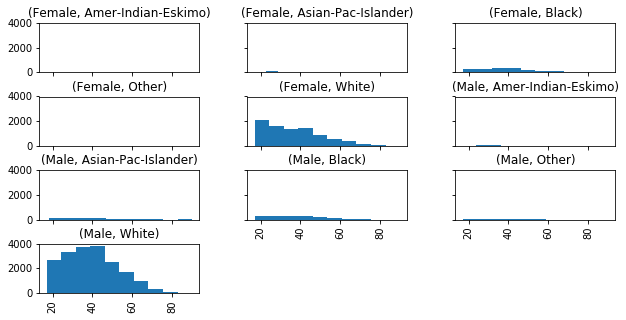

In [27]:
df.hist('age',by= ['sex','race'], figsize=(10,5), sharex= True, sharey= True) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000130841BA860>,
      dtype=object)

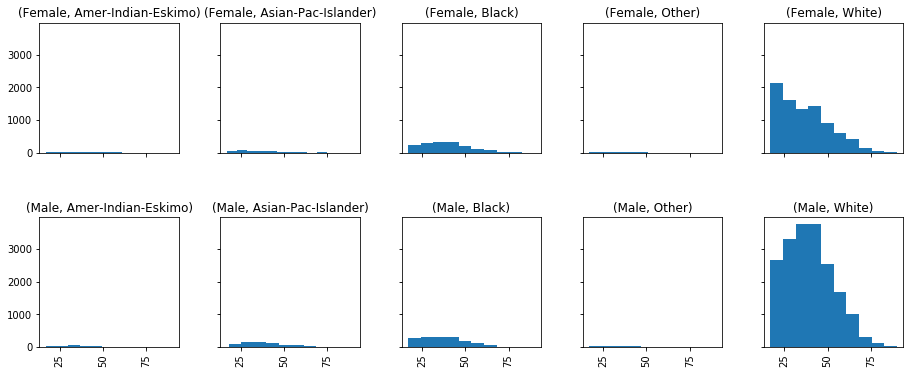

In [29]:
df.hist('age',by= ['sex','race'], figsize=(15,6), sharex= True, sharey= True, layout=(2,5)) 

### Categorical Variables

In [30]:
df.describe(exclude=[np.number])

,workclass,education,marital_status,occupation,relationship,race,sex,country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


Approximately 25% of individuals are high-income earners. However, our dataset contains a great many white individuals: approximately 87% of individuals are white. While 41 different countries are represented, almost all of them are from the United States.

## Correlations

In [ ]:
# correlation: linear relationship; are related to the mean.

Suppose we first try to compute all possible correlations between all numerical variables in the dataset.

In [14]:
df.corr().round(3)

,age,education_num,capital_gain,capital_loss,hours_per_week
age,1.000,0.037,0.078,0.058,0.069
education_num,0.037,1.000,0.123,0.080,0.148
capital_gain,0.078,0.123,1.000,-0.032,0.078
capital_loss,0.058,0.080,-0.032,1.000,0.054
hours_per_week,0.069,0.148,0.078,0.054,1.000


All correlations seem rather low. It does not simply mean that all variables are unrelated to one another; it could be that some of their relationships are non-linear, or non-monotone.

For instance, consider `age` and `hours_per_week`. It looks as though there is a quadratic relationship between the two variables.

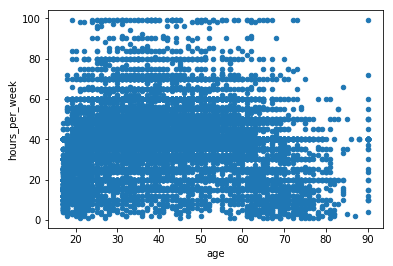

In [32]:
df.plot('age', 'hours_per_week', kind='scatter') 

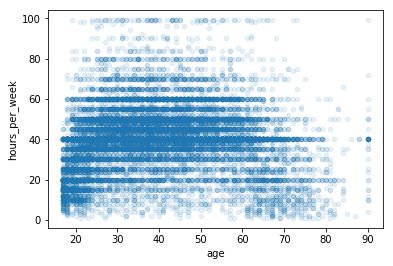

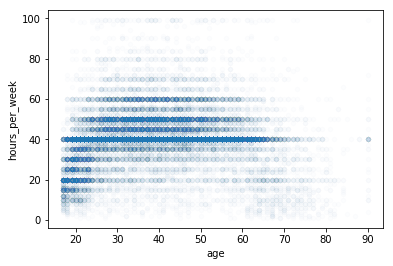

In [33]:
df.plot('age', 'hours_per_week', kind='scatter', alpha=0.1) # alpha --> transparent the data.
df.plot('age', 'hours_per_week', kind='scatter', alpha=0.01) 

In [34]:
# Split age into two groups and compute correlation within each group with 
# hours_per_week.
x = df.loc[:,['age','hours_per_week']]
x['age_cat'] = x.age.apply(lambda x: 'old' if x >= 38 else 'young')
x.groupby('age_cat').corr().round(3)

age  hours_per_week
age_cat                                      
old     age             1.000          -0.266
        hours_per_week -0.266           1.000
young   age             1.000           0.382
        hours_per_week  0.382           1.000

In [17]:
df[(df.capital_gain > 0) &(df.capital_loss > 0)].shape

(0, 14)

No individual has both a positive capital gain and a positive capital loss. 28330 of the individuals have 0 capital gain **and** 0 capital loss.

### Categorical Variables

It is incredible how much more likely a male is to be a high-earner, when controlling for race. This relationship also holds when controlling for other variables, example occupation.

In [18]:
df.pivot_table(index='sex', columns='race', values='income',
               aggfunc=lambda x: np.mean(x == '>50K'))

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,0.10084,0.124277,0.057878,0.055046,0.118954
Male,0.12500,0.336219,0.189293,0.117284,0.317565


In [19]:
df.pivot_table(index='sex', columns='occupation', values='income',
               aggfunc=lambda x: np.mean(x == '>50K'))

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
sex,,,,,,,,,,,,,,
Female,0.083563,NaN,0.09009,0.241588,0.030769,0.024390,0.036364,0.028333,0.007092,0.254125,0.131579,0.069675,0.129310,0.10000
Male,0.239254,0.111111,0.23446,0.580667,0.121636,0.067993,0.158402,0.057525,0.000000,0.561524,0.350785,0.374948,0.410345,0.20637


In [20]:
pd.crosstab(df.sex, df.occupation)

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
sex,,,,,,,,,,,,,,
Female,2537,0,222,1159,65,164,550,1800,141,1515,76,1263,348,90
Male,1233,9,3877,2907,929,1206,1452,1495,8,2625,573,2387,580,1507


In [21]:
# x = df.income
# x.value_counts()['>50K']
# len(x)

def sc(x):
    vc = np.sum(x == '>50K')
    ll = len(x)
    return((vc+1/6)/(ll+1/3))

df.pivot_table(index='sex', columns='occupation', values='income',
               aggfunc=sc)
    

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
sex,,,,,,,,,,,,,,
Female,0.083618,NaN,0.090705,0.241662,0.033163,0.025355,0.036644,0.028421,0.008255,0.254179,0.133188,0.069789,0.129665,0.101476
Male,0.239324,0.125,0.234482,0.580658,0.121772,0.068113,0.158481,0.057624,0.020000,0.561516,0.350872,0.374965,0.410396,0.206435


## Basic Plots

### Histograms

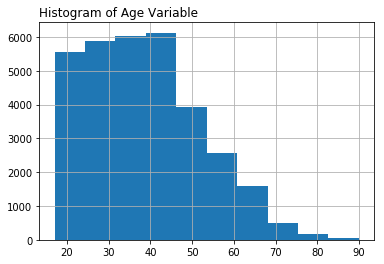

In [114]:
df['age'].hist()
_ = plt.title('Histogram of Age Variable', loc='left')

Suppose we focus on the high-income males, and the high-income females.

In [10]:
df.income.describe()

# df.sex.desribe()
ml = df[df.sex == 'Male']
ml1 = df[(df.sex == 'Male') & (df.income == '>50K')]
fml = df[df.sex == 'Female']
fml1 = df[(df.sex == 'Female') & (df.income == '>50K')]

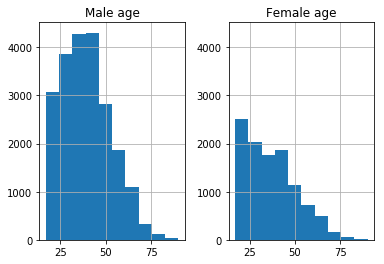

In [13]:
ax1 = plt.subplot(121)
ml.age.hist()
plt.title('Male age')
plt.subplot(122, sharey=ax1)
fml.age.hist()
plt.title('Female age')
plt.subplots_adjust(wspace=0.3)

### Bar Plots

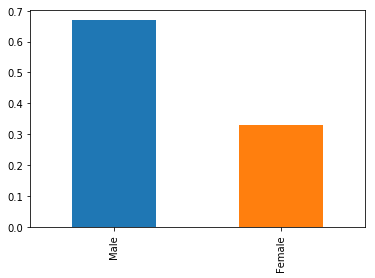

In [16]:
df.sex.value_counts(normalize=True).plot(kind='bar')

We see that we have more than twice as many males as females in our dataset.

### Boxplots

Text(0.5,1,'')

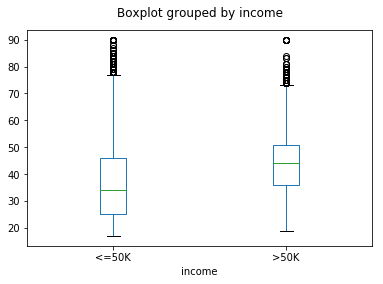

In [48]:
ax = df.boxplot(column='age', by='income', grid=False)
ax.set_title('')

This seems to suggest that the median age for the high-earner group is higher than that for the low-earner group. The distributions of age in both groups are right-skewed. It might help to perform a transformation of `age` before plotting.

Text(0.5,1,'')

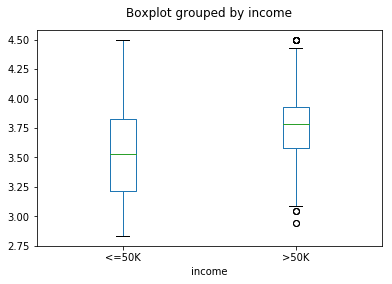

In [59]:
df['l_age'] = np.log(df.age)
ax = df.boxplot(column='l_age', by='income', grid=False)
ax.set_title('')

In the high-earner group, the spread of age is much smaller than that for the low-earners. There are a outliers on both sides of the median; there are some who are very young and some who are very old. 

It might be worth inspecting these individuals.

Text(0.5,1,'')

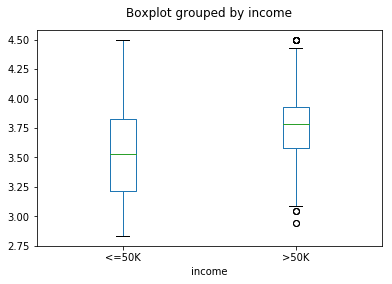

In [70]:
lines = df.boxplot(column='l_age', by='income', return_type='dict' ,grid=False)
plt.title('')

In [71]:
lines['l_age']['fliers'][1].get_ydata()
# Need to get the smallest 5 and largest 8 ages in the high-earner group

array([3.04452244, 2.94443898, 3.04452244, 3.04452244, 2.94443898,
       4.49980967, 4.49980967, 4.49980967, 4.49980967, 4.49980967,
       4.49980967, 4.49980967, 4.49980967])

In [74]:
df[df.income=='>50K'].sort_values(by='age').head(5)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income,l_age
7741,19,Private,7th-8th,4,Never-married,Other-service,Not-in-family,White,Male,0,0,60,United-States,>50K,2.944439
22910,19,NaN,12th,8,Married-civ-spouse,NaN,Other-relative,White,Female,15024,0,40,United-States,>50K,2.944439
5624,21,Private,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,Amer-Indian-Eskimo,Female,0,0,46,United-States,>50K,3.044522
12847,21,Private,HS-grad,9,Married-civ-spouse,Prof-specialty,Own-child,White,Male,0,0,40,Mexico,>50K,3.044522
10962,21,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,Black,Female,99999,0,40,United-States,>50K,3.044522


In [75]:
df[df.income=='>50K'].sort_values(by='age').tail(8)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income,l_age
8806,90,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,>50K,4.49981
10545,90,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,9386,0,50,Ecuador,>50K,4.49981
31696,90,NaN,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,>50K,4.49981
5406,90,Private,Masters,14,Never-married,Exec-managerial,Not-in-family,Black,Male,0,0,50,United-States,>50K,4.49981
5370,90,Local-gov,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,>50K,4.49981
15892,90,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,England,>50K,4.49981
20610,90,Private,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K,4.49981
8973,90,Private,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,9386,0,15,United-States,>50K,4.49981


### Variation of High-Earner Proportion with Age

These are interesting to study, but what we should be interested in is how proportion of high-earners changes as age varies.

In [82]:
df['age_breaks'] = pd.cut(df.age, 10)

In [113]:
m_age = df[df.sex == 'Male'].groupby(['age_breaks']).agg({'income': lambda x: np.mean(x == '>50K')})
f_age = df[df.sex == 'Female'].groupby(['age_breaks']).agg({'income': lambda x: np.mean(x == '>50K')})

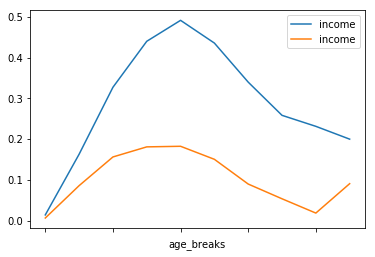

In [116]:
ax = m_age.plot()
f_age.plot(ax=ax)